In [2]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

dir_data='./data/'

f_app=os.path.join(dir_data,'application_train.csv')
train=pd.read_csv(f_app)
train.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
cut_rule=[0,1,2,3,5,1000]#分成 0~1 1~2 2~3 3~5 5以上幾個範圍
train['CNT_CHILDREN_GROUP'] = pd.cut(train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
train['CNT_CHILDREN_GROUP'].value_counts()


(-0.001, 1.0]    276490
(1.0, 2.0]        26749
(2.0, 3.0]         3717
(3.0, 5.0]          513
(5.0, 1000.0]        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [47]:
grp =train['CNT_CHILDREN_GROUP']  

grouped_df = train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP
(-0.001, 1.0]    168361.253573
(1.0, 2.0]       172580.748737
(2.0, 3.0]       173948.262712
(3.0, 5.0]       171293.508772
(5.0, 1000.0]    147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64

KeyError: 'Column not found: 0'

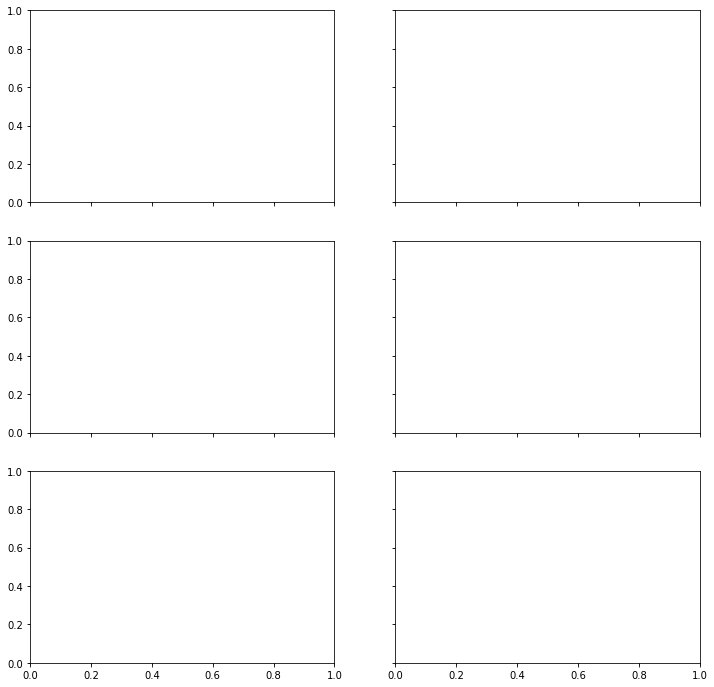

In [54]:
plt_column =cut_rule  
plt_by =train['AMT_INCOME_TOTAL'] 

train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()